In [1]:
import pandas as pd
import numpy as np

In [2]:
file = "oct27.supertsv"
data = open(file, "r",encoding='utf-8')
text = data.read()
print(text)
print(type(text))

TWEET	28936861036	2010-10-27T23:45:46
TOKENS
O	I
V	predict
O	I
V	won't
V	win
D	a
A	single
N	game
O	I
V	bet
P	on
,	.
V	Got
^	Cliff
^	Lee
N	today
,	,
P	so
P	if
O	he
V	loses
L	its
P	on
O	me
~	RT
@	@e_one
~	:
^	Texas
,	(
~	cont
,	)
U	http://tl.gd/6meogh

TWEET	28860895780	2010-10-27T04:46:50
TOKENS
~	RT
@	@DjBlack_Pearl
~	:
O	wat
N	muhfuckaz
V	wearin
P	4
D	the
N	lingerie
N	party
,	?????

TWEET	28926445302	2010-10-27T21:34:03
TOKENS
^	Wednesday
A	27th
^	october
$	2010
,	.
V	》have
D	a
A	nice
N	day
E	:)

TWEET	28858674639	2010-10-27T04:08:18
TOKENS
~	RT
@	@ddlovato
~	:
@	@joejonas
!	oh
,	,
!	hey
N	THANKS
N	jerk
,	!

TWEET	28907504608	2010-10-27T16:59:20
TOKENS
@	@thecamion
O	I
V	like
N	monkeys
,	,
&	but
O	I
R	still
V	hate
^	COSTCO
N	parking
N	lots
,	..

TWEET	28928905162	2010-10-27T22:07:35
TOKENS
@	@DDaimaru
O	I
V	may
V	have
P	to
V	get
^	minecraft
P	after
V	watching
N	videos
P	of
O	it

TWEET	28913986365	2010-10-27T18:30:51
TOKENS
~	RT
@	@eye_ee_duh_Esq
~	:
!	LMBO
,	!
D	This
N	man
V	filed
D	a

In [3]:
texts = text.split('\n')

In [4]:
texts

['TWEET\t28936861036\t2010-10-27T23:45:46',
 'TOKENS',
 'O\tI',
 'V\tpredict',
 'O\tI',
 "V\twon't",
 'V\twin',
 'D\ta',
 'A\tsingle',
 'N\tgame',
 'O\tI',
 'V\tbet',
 'P\ton',
 ',\t.',
 'V\tGot',
 '^\tCliff',
 '^\tLee',
 'N\ttoday',
 ',\t,',
 'P\tso',
 'P\tif',
 'O\the',
 'V\tloses',
 'L\tits',
 'P\ton',
 'O\tme',
 '~\tRT',
 '@\t@e_one',
 '~\t:',
 '^\tTexas',
 ',\t(',
 '~\tcont',
 ',\t)',
 'U\thttp://tl.gd/6meogh',
 '',
 'TWEET\t28860895780\t2010-10-27T04:46:50',
 'TOKENS',
 '~\tRT',
 '@\t@DjBlack_Pearl',
 '~\t:',
 'O\twat',
 'N\tmuhfuckaz',
 'V\twearin',
 'P\t4',
 'D\tthe',
 'N\tlingerie',
 'N\tparty',
 ',\t?????',
 '',
 'TWEET\t28926445302\t2010-10-27T21:34:03',
 'TOKENS',
 '^\tWednesday',
 'A\t27th',
 '^\toctober',
 '$\t2010',
 ',\t.',
 'V\t》have',
 'D\ta',
 'A\tnice',
 'N\tday',
 'E\t:)',
 '',
 'TWEET\t28858674639\t2010-10-27T04:08:18',
 'TOKENS',
 '~\tRT',
 '@\t@ddlovato',
 '~\t:',
 '@\t@joejonas',
 '!\toh',
 ',\t,',
 '!\they',
 'N\tTHANKS',
 'N\tjerk',
 ',\t!',
 '',
 'TWEET\t289

In [5]:
tweet_count = 0
for i in texts:
    if "TWEET\t" in i:
        tweet_count += 1

In [6]:
tweet_count

1827

In [7]:
def token_counter(texts):
    token_count = 0
    for i in texts:
        if not i.startswith('TWEET\t') and i!='TOKENS' and i != '':
            token_count += 1
    return token_count

In [8]:
total_tokens = token_counter(texts)

In [9]:
total_tokens

26594

In [10]:
avg_tokens = token_counter(texts)/tweet_count

In [11]:
avg_tokens

14.556102900930487

In [12]:
def tag_counter(tag, texts):
    count = 0
    for i in texts:
        if tag+"\t" in i:
            count += 1
    return count

In [13]:
def tag_counter(tag, texts):
    count = 0
    for i in texts:
        if i.startswith(tag+'\t'):
            count += 1
    return count

In [14]:
common_noun = tag_counter('N', texts)
pronoun = tag_counter('O', texts)
nominal_poss = tag_counter('S', texts)
proper_noun = tag_counter('^', texts)
proper_noun_poss = tag_counter('Z', texts)
nominal_verbal = tag_counter('L', texts)
proper_noun_verbal = tag_counter('M', texts)
nn_verbal = common_noun+pronoun+nominal_poss+proper_noun+proper_noun_poss+nominal_verbal+proper_noun_verbal

verb = tag_counter('V', texts)
adj = tag_counter('A', texts)
adv = tag_counter('R', texts)
interj = tag_counter('!', texts)
open_class = verb+adj+adv+interj

determiner = tag_counter('D', texts)
pos_conj = tag_counter('P', texts)
coor_conj = tag_counter('&', texts)
verb_particle = tag_counter('T', texts)
exist = tag_counter('X', texts)
x_verbal = tag_counter('Y', texts)
closed_class = determiner+pos_conj+coor_conj+verb_particle+exist+x_verbal

hashtag = tag_counter('#', texts)
at = tag_counter('@', texts)
discourse = tag_counter('~', texts)
url = tag_counter('U', texts)
emoticon = tag_counter('E', texts)
twitter = hashtag+at+discourse+url+emoticon

numeral = tag_counter('$', texts)
punc = tag_counter(',', texts)
abb = tag_counter('G', texts)
miscellaneous = numeral+punc+abb

In [15]:
nn_verbal+open_class+closed_class+twitter+miscellaneous

26594

In [16]:
tag_counts = [common_noun,pronoun,nominal_poss,proper_noun,proper_noun_poss,nominal_verbal,proper_noun_verbal,
            verb,adj,adv,interj,determiner,pos_conj,coor_conj,verb_particle,exist,x_verbal,
            hashtag,at,discourse,url,emoticon,numeral,punc,abb]

In [17]:
tag_names = ['common_noun','pronoun','nominal_poss','proper_noun','proper_noun_poss','nominal_verbal','proper_noun_verbal',
            'verb','adj','adv','interj','determiner','pos_conj','coor_conj','verb_particle','exist','x_verbal',
            'hashtag','at','discourse','url','emoticon','numeral','punc','abb']

In [24]:
tag_letter = ['N','O','S','^','Z','L','M','V','A','R','!','D','P','&','T','X','Y','#','@','~','U','E','$',',','G']

In [27]:
tag_letter_dict = dict()
for i in range(len(tag_letter)):
    tag_letter_dict[tag_letter[i]] = tag_counts[i]

In [29]:
tag_letter_dict

{'N': 3644,
 'O': 1901,
 'S': 29,
 '^': 1696,
 'Z': 52,
 'L': 446,
 'M': 3,
 'V': 4023,
 'A': 1361,
 'R': 1237,
 '!': 691,
 'D': 1630,
 'P': 2308,
 '&': 457,
 'T': 164,
 'X': 25,
 'Y': 2,
 '#': 271,
 '@': 1286,
 '~': 920,
 'U': 431,
 'E': 263,
 '$': 387,
 ',': 3095,
 'G': 272}

In [33]:
sort_letters = {k: v for k, v in sorted(tag_letter_dict.items(), key=lambda item: item[1],reverse = True)}

<BarContainer object of 25 artists>

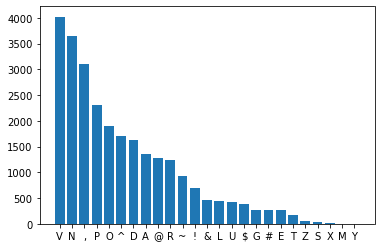

In [34]:
plt.bar(sort_letters.keys(), sort_letters.values())

In [28]:
tag_dict = dict()
for i in range(len(tag_names)):
    tag_dict[tag_names[i]] = tag_counts[i]

In [19]:
tag_dict

{'common_noun': 3644,
 'pronoun': 1901,
 'nominal_poss': 29,
 'proper_noun': 1696,
 'proper_noun_poss': 52,
 'nominal_verbal': 446,
 'proper_noun_verbal': 3,
 'verb': 4023,
 'adj': 1361,
 'adv': 1237,
 'interj': 691,
 'determiner': 1630,
 'pos_conj': 2308,
 'coor_conj': 457,
 'verb_particle': 164,
 'exist': 25,
 'x_verbal': 2,
 'hashtag': 271,
 'at': 1286,
 'discourse': 920,
 'url': 431,
 'emoticon': 263,
 'numeral': 387,
 'punc': 3095,
 'abb': 272}

In [20]:
sort_tags = {k: v for k, v in sorted(tag_dict.items(), key=lambda item: item[1],reverse = True)}

In [21]:
sort_tags

{'verb': 4023,
 'common_noun': 3644,
 'punc': 3095,
 'pos_conj': 2308,
 'pronoun': 1901,
 'proper_noun': 1696,
 'determiner': 1630,
 'adj': 1361,
 'at': 1286,
 'adv': 1237,
 'discourse': 920,
 'interj': 691,
 'coor_conj': 457,
 'nominal_verbal': 446,
 'url': 431,
 'numeral': 387,
 'abb': 272,
 'hashtag': 271,
 'emoticon': 263,
 'verb_particle': 164,
 'proper_noun_poss': 52,
 'nominal_poss': 29,
 'exist': 25,
 'proper_noun_verbal': 3,
 'x_verbal': 2}

In [31]:
import matplotlib.pyplot as plt

In [36]:
df_tags = pd.DataFrame.from_dict(sort_tags.items())

In [37]:
df_tags.rename(columns={0: 'tag', 1: 'count'},inplace = True)

In [38]:
df_tags['character'] = sort_letters.keys()

In [39]:
df_tags['proportion'] = round((df_tags['count']/total_tokens)*100,1)

In [40]:
df_tags.head()

,tag,count,character,proportion
0,verb,4023,V,15.1
1,common_noun,3644,N,13.7
2,punc,3095,",",11.6
3,pos_conj,2308,P,8.7
4,pronoun,1901,O,7.1
